In [2]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

batch_size = 64
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

print(np.max(X_train))
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,
                                                             X_train,
                                                             test_size=0.2,
                                                             random_state=13)

input_img = Input(shape = (784,))
num_classes = 10

def Encoder_part(input_img):

    encoded = Dense(units=256, activation='relu')(input_img)
    encoded = Dense(units=128, activation='relu')(encoded)
    encoded = Dense(units=64, activation='relu')(encoded)
    encoded = Dense(units=32, activation='relu')(encoded)

    return encoded

def Decoder_part(encoded):
        
    decoded = Dense(units=64, activation='relu')(encoded)
    decoded = Dense(units=128, activation='relu')(decoded)
    decoded = Dense(units=256, activation='relu')(decoded)
    decoded = Dense(units=784, activation='relu')(decoded)
    
    return decoded

(60000, 784)
(10000, 784)
1.0


In [3]:
autoencoder1=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder2=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder3=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder4=Model(input_img, Decoder_part(Encoder_part(input_img)))
#autoencoder5=Model(input_img, Decoder_part(Encoder_part(input_img)))
autoencoder_final=Model(input_img, Decoder_part(Encoder_part(input_img)))

W0710 17:47:24.120445 140063529092992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
#encoder = Model(input_img, Encoder_part(input_img))

autoencoder1.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder2.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder3.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder4.compile(loss='mean_squared_error', optimizer = SGD())
#autoencoder5.compile(loss='mean_squared_error', optimizer = SGD())
autoencoder_final.compile(loss='mean_squared_error', optimizer = SGD())

autoencoder1.summary()
autoencoder2.summary()
autoencoder3.summary()
#autoencoder4.summary()
#autoencoder5.summary()
autoencoder_final.summary()



In [0]:
#print(train_X[1][1])
#print(np.shape(train_X))
batch_train_X = []
batch_train_ground = []
train_X = np.array(train_X)
train_ground = np.array(train_ground)
i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_X[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_X.append(x)
print("done")

In [6]:
#print(np.shape(train_X))
print(np.shape(batch_train_ground))

(0,)


In [7]:
i=0
while i < 48000:
  x  = []
  j = 0
  while j<1000:
    x.append(train_ground[i])
    j = j+1
    i = i+1
  #print(i)
  batch_train_ground.append(x)
print("done")

done


In [8]:
#print(train_X[0])
print(np.shape(batch_train_X[0][1]))

(784,)


In [11]:
count = 0
number = 0
for epo in range (0,75):
  number = 0
  print("entered first loop : ", epo)
  for i,j in zip(batch_train_X,batch_train_ground):
    print("entered second loop : ")
    number = number + 1
    i = [i]
    j = [j]
    print("**************************************************************************************************************8")
    print("batch : " , number, "epoch : ", epo)
    if count == 0:
      print("Entered if 1", count)
      autoencoder_train1 = autoencoder1.fit(i,j, batch_size=100,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    if count == 1:
      print("Entered if 2", count)
      autoencoder_train2 = autoencoder2.fit(i,j, batch_size=100,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    if count == 2:  
      autoencoder_train3 = autoencoder3.fit(i,j, batch_size=100,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
      count = count+1
    #if count == 3:  
    #  autoencoder_train4 = autoencoder4.fit(i,j, batch_size=512,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
     # count = count+1
    #if count ==4:  
    #  autoencoder_train5 = autoencoder5.fit(i,j, batch_size=512,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
    #  count = count+1
    if count ==3:
      print("Entered if 3", count)
      count = 0
      w1 = np.array(autoencoder1.get_weights())
      w2 = np.array(autoencoder2.get_weights())
      w3 = np.array(autoencoder3.get_weights())
      #w4 = np.array(autoencoder4.get_weights())
      #w5 = np.array(autoencoder5.get_weights())
      w_final = (w1+w2+w3)/3
      
      print("Taken weights")
      
      w_cur = np.array(autoencoder_final.get_weights())
      w_final = (w_cur+w_final)/2

      
    
      print("Meaned weights")
    
      
    
      autoencoder_final.set_weights(w_final)
      autoencoder1.set_weights(w_final)
      autoencoder2.set_weights(w_final)
      autoencoder3.set_weights(w_final)
      #autoencoder4.set_weights(w_final)
      #autoencoder5.set_weights(w_final)
      #autoencoder.set_weights(w_final)
      
      print("Going to the top again")



1000/1000 [==============================] - 0s 237us/step - loss: 0.0818 - val_loss: 0.0820
Entered if 2 1
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 230us/step - loss: 0.0818 - val_loss: 0.0820
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 219us/step - loss: 0.0818 - val_loss: 0.0820
Entered if 3 3
Taken weights
Meaned weights
Going to the top again
entered second loop : 
**************************************************************************************************************8
batch :  7 epoch :  69
Entered if 1 0
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 218us/step - loss: 0.0797 - val_loss: 0.0820
Entered if 2 1
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 232us/step - loss: 0.0797 - val_loss: 0.0820
Train on 1000 samples, valida

In [0]:
loss = autoencoder_train1.history['loss']
val_loss = autoencoder1.history['val_loss']
epochs = range(75)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss - AE1')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

'''
loss = autoencoder_train2.history['loss']
val_loss = autoencoder_train2.history['val_loss']
epochs = range(100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
weight'''

In [0]:
wt_fn = autoencoder_final.get_weights()
print("Weights taken")
print(np.shape(wt_fn[0]))

Weights taken
(784, 256)


In [0]:
(_, y_train), (_, y_test) = mnist.load_data()
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

train_X,valid_X,y_train,y_valid = train_test_split(X_train,train_Y_one_hot,test_size=0.2,random_state=13)

In [0]:
def fc(enco):
    flat = enco
    den = Dense(64, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [0]:
full_model1 = Model(input_img,fc(Encoder_part(input_img)))
full_model2 = Model(input_img,fc(Encoder_part(input_img)))
full_model3 = Model(input_img,fc(Encoder_part(input_img)))
#full_model4 = Model(input_img,fc(Encoder_part(input_img)))
#full_model5 = Model(input_img,fc(Encoder_part(input_img)))
full_model_final = Model(input_img,fc(Encoder_part(input_img)))

In [0]:
for l1,l2 in zip(full_model1.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())
for l1,l2 in zip(full_model2.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())
for l1,l2 in zip(full_model3.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())
#for l1,l2 in zip(full_model4.layers[:6],autoencoder_final.layers[0:6]):
#    l1.set_weights(l2.get_weights())
#for l1,l2 in zip(full_model5.layers[:6],autoencoder_final.layers[0:6]):
#    l1.set_weights(l2.get_weights())
for l1,l2 in zip(full_model_final.layers[:6],autoencoder_final.layers[0:6]):
    l1.set_weights(l2.get_weights())

In [0]:
#for layer in full_model1.layers[0:6]:
    #layer.trainable = False
full_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#for layer in full_model2.layers[0:6]:
    #layer.trainable = False
full_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#for layer in full_model3.layers[0:6]:
    #layer.trainable = False
full_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#for layer in full_model4.layers[0:6]:
#    layer.trainable = False
#full_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#for layer in full_model5.layers[0:6]:
#    layer.trainable = False
#full_model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
for layer in full_model1.layers[0:6]:
    layer.trainable = False
for layer in full_model2.layers[0:6]:
    layer.trainable = False
for layer in full_model3.layers[0:6]:
    layer.trainable = False

In [0]:
full_model1.summary()
full_model2.summary()
full_model3.summary()
#full_model4.summary()
#full_model5.summary()
full_model_final.summary()

In [26]:
batch_train_y = []
batch_train_x = []
i=0
while i < 48000:
  x  = []
  y = []
  j = 0
  while j<1000:
    x.append(train_X[i])
    y.append(y_train[i])
    j = j+1
    i = i+1
  print(i)
  batch_train_x.append(x)
  batch_train_y.append(y)
print("done")


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
done


In [29]:
count = 0
batch = 0
epo = 0
for epo in range(50):
  for i,j in zip(batch_train_x, batch_train_y):
    i = [i]
    j = [j]
    print("************************Epoch : ", epo)
    if count == 0:
      classify_train = full_model1.fit(i, j, batch_size=64,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
      count = count+1
    if count == 1:  
      classify_train = full_model2.fit(i, j, batch_size=64,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
      count = count+1
    if count == 2:  
      classify_train = full_model3.fit(i, j, batch_size=64,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
      count = count+1
    if count == 3:
      count =0
#classify_train = full_model4.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))
#classify_train = full_model5.fit(train_X, y_train, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))
w1=np.array(full_model1.get_weights())
w2=np.array(full_model2.get_weights())
w3=np.array(full_model3.get_weights())
#w4=np.array(full_model4.get_weights())
#w5=np.array(full_model5.get_weights())
w_fin = (w1+w2+w3)/3
full_model_final.set_weights(w_fin)

1000/1000 [==============================] - 0s 269us/step - loss: 2.0294 - acc: 0.3390 - val_loss: 2.0319 - val_acc: 0.3604
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 268us/step - loss: 2.0620 - acc: 0.3270 - val_loss: 2.0645 - val_acc: 0.3539
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 290us/step - loss: 2.0631 - acc: 0.3340 - val_loss: 2.0655 - val_acc: 0.3523
************************Epoch :  42
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 278us/step - loss: 2.0188 - acc: 0.3760 - val_loss: 2.0318 - val_acc: 0.3597
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 273us/step - loss: 2.0524 - acc: 0.3690 - val_loss: 2.0644 - val_acc: 0.3536
Train on 1000 samples, validate on 12000 samples
Epoch 1/1
1000/1000 [==============================] -

In [0]:
full_model1.save_weights('classification_complete1.h5')
full_model2.save_weights('classification_complete2.h5')
full_model3.save_weights('classification_complete3.h5')
#full_model4.save_weights('classification_complete4.h5')
#full_model5.save_weights('classification_complete5.h5')
full_model_final.save_weights('classification_complete_final.h5')


In [0]:
for layer in full_model1.layers[0:19]:
    layer.trainable = True
for layer in full_model2.layers[0:19]:
    layer.trainable = True
for layer in full_model3.layers[0:19]:
    layer.trainable = True
#for layer in full_model4.layers[0:19]:
#    layer.trainable = True
#for layer in full_model5.layers[0:19]:
#    layer.trainable = True
for layer in full_model_final.layers[0:19]:
    layer.trainable = True

In [0]:
full_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
full_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
full_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#full_model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#full_model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
full_model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [0]:
np.shape(j)

(1000,)

In [0]:
count = 0
number = 0
for epo in range (0,20):
  number = 0
  print("entered first loop : ", epo)
  for i,j in zip(batch_train_x,batch_train_y):
    print("entered second loop : ")
    number = number + 1
    i = [i]
    j = [j]
    print("**************************************************************************************************************8")
    print("batch : " , number, "epoch : ", epo)
    if count == 0:
      print("Entered if 1", count)
      classify_train = full_model1.fit(i, j, batch_size=100,epochs=1,verbose=1)
      count = count+1
    if count == 1:
      print("Entered if 2", count)
      classify_train = full_model2.fit(i, j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
      count = count+1
    if count == 2:  
      classify_train = full_model3.fit(i, j, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
      count = count+1
    #if count == 3:  
    #  classify_train = full_model4.fit(i, jj, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
    #  count = count+1
    #if count ==4:  
    #  classify_train = full_model5.fit(i, jj, batch_size=1000,epochs=1,verbose=1,validation_data=(valid_X, y_valid))
    #  count = count+1
    if count ==3:
      print("Entered if 3", count)
      count = 0
      w1 = np.array(full_model1.get_weights())
      w2 = np.array(full_model2.get_weights())
      w3 = np.array(full_model3.get_weights())
      #w4 = np.array(full_model4.get_weights())
      #w5 = np.array(full_model5.get_weights())
      w_final = (w1+w2+w3)/3
      
      print("Taken weights")
      
      w_cur = np.array(full_model_final.get_weights())
      w_final = (w_cur+w_final)/2

      
    
      print("Meaned weights")
    
      
    
      full_model1.set_weights(w_final)
      full_model2.set_weights(w_final)
      full_model3.set_weights(w_final)
      #full_model4.set_weights(w_final)
      #full_model5.set_weights(w_final)
      full_model_final.set_weights(w_final)
      #autoencoder.set_weights(w_final)
      
      print("Going to the top again")



In [0]:
final_t_x, final_te_x, final_t_y, final_te_y = train_test_split(train_X, y_train, test_size = 0.2, random_state = 12)

In [52]:
print(np.shape(final_te_x))
print(np.shape(final_te_y))
print(np.shape(train_X))
print(np.shape(y_train))
print(np.shape(valid_X))
print(np.shape(y_valid))

(9600, 784)
(9600, 10)
(48000, 784)
(48000, 10)
(12000, 784)
(12000, 10)


In [54]:
eval_model=full_model_final.evaluate(valid_X, y_valid)


12000/12000 [==============================] - 1s 50us/step


In [55]:
print(eval_model)

[0.23019899504170044, 0.9788333333333333]


In [0]:
full_model_final.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
classify_train = full_model_final.fit(final_te_x, final_te_y, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, y_valid))

In [0]:
full_model_final.save_weights('classification_complete.h5')


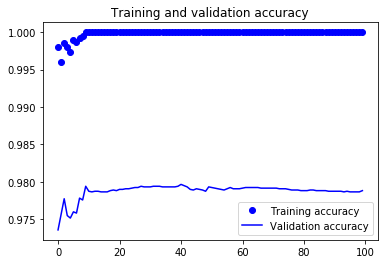

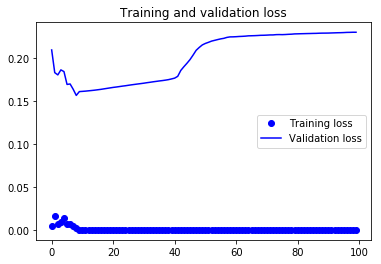

In [56]:
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_eval = full_model.evaluate(X_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.17859678938569792
Test accuracy: 0.9791
